<a href="https://colab.research.google.com/github/enyeneraph/ML-pack-capstone-project/blob/main/Enyene/covid19_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary libraries**

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)

**Reading the dataset**

In [166]:
df = pd.read_csv('https://raw.githubusercontent.com/enyeneraph/ML-pack-capstone-project/main/Kaggle_Sirio_Libanes_ICU_Prediction%20-%20Sheet1.csv')

In [167]:
df.shape

(1925, 231)

In [168]:
df.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

## **Exploratory Data Analysis**

**A chart to show how many patients were admitted into the ICU**

In [171]:
above_12_df = df[df['WINDOW'] == 'ABOVE_12']
#group by ICU admission
above_12_df = above_12_df.groupby(by= 'ICU')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
above_12_df.columns = ['ICU', 'NUMBER_ADMITTED']
above_12_df

,ICU,NUMBER_ADMITTED
0,0,190
1,1,195


[Text(0, 0.5, 'Number of admissions'),
 [Text(0, 0, 'Admitted'), Text(0, 0, 'Not Admitted')],
 Text(0.5, 0, 'ICU admission')]

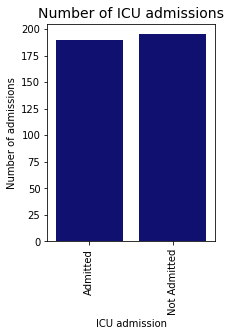

In [172]:
#plotting the bar chart
plt.figure(figsize= (3,4))
plt.xticks(rotation= 90)
g = sns.barplot(x='ICU', y= 'NUMBER_ADMITTED', data= above_12_df, color='navy')
plt.title('Number of ICU admissions', fontdict= {'fontsize' : 14})
g.set(xlabel= 'ICU admission', ylabel = 'Number of admissions', xticklabels= ['Admitted', 'Not Admitted'])


# **Plotting the distribution of ICU admission window**

In [173]:
#Obtain a dataframe of only patients admitted
#What I need
#x_axis: all the windows
#y_axis: number of ICU admissions

#first obtain dataframe of only patients that got an ICU addmission
#get the id of patients who's above_16's ICU is 1
df_above12 = df[df['WINDOW'] == 'ABOVE_12']
icu_by_id = df_above12[df_above12['ICU'] == 1]['PATIENT_VISIT_IDENTIFIER']

In [174]:
#get all patients that were admitted into the id 
icu_df = df[df['PATIENT_VISIT_IDENTIFIER'].isin(icu_by_id)]

In [175]:
#return the index of the 'WINDOW' of first occurence of ICU admission status for each patient
trial = icu_df.groupby('PATIENT_VISIT_IDENTIFIER')['ICU'].idxmax()

In [176]:
#return the rows corresponding to these indexes
first_time_icu_df = icu_df.loc[trial]

#return the frequency of first occurence of ICU admission status per window

#GROUP BY WINDOW
first_time_icu_df = first_time_icu_df.groupby('WINDOW')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
first_time_icu_df.rename(columns= {'PATIENT_VISIT_IDENTIFIER' :'ICU_ADMISSIONS'}, inplace=True)

first_time_icu_df

,WINDOW,ICU_ADMISSIONS
0,0-2,32
1,2-4,27
2,4-6,40
3,6-12,31
4,ABOVE_12,65


[Text(0.5, 1.0, 'Frequency Distribution of Window period for ICU admissions')]

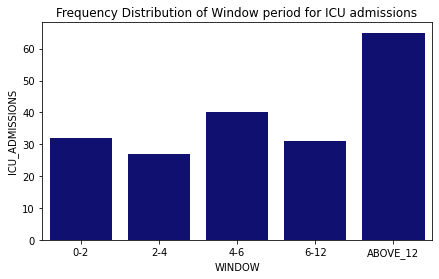

In [177]:
#plotting the graph
plt.figure(figsize=(7,4))
g = sns.barplot(x= 'WINDOW', y= 'ICU_ADMISSIONS', data= first_time_icu_df, color= 'navy')
g.set(title= 'Frequency Distribution of Window period for ICU admissions')


In [178]:
#checking for duplicate columns
print(df.shape)
df = df.T.drop_duplicates().T
print(df.shape)


(1925, 231)
(1925, 88)


# **Missing values**  
Windows with missing values will be filled with values from neighbouring windows for each patient.

In [ ]:
new_df = df.groupby('PATIENT_VISIT_IDENTIFIER').fillna(method= 'bfill').fillna(method= 'ffill')
# print(new_df.head())
new_df.insert(0, 'PATIENT_VISIT_IDENTIFIER', df['PATIENT_VISIT_IDENTIFIER'])
df = new_df


In [189]:
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,-0.283951,-0.376923,-0.188679,-0.379310,-0.107143,0.736842,-0.340206,-0.4875,-0.572650,-0.857143,0.318681,0.898990,-0.076923,0.286486,0.298507,0.272727,-0.275362,0.736842,-0.33913,0.325153,0.114504,0.176471,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-1.0,-0.871658,-0.863874,-0.317073,-0.414634,-

# **Selecting data for modeling**  
We will be using the data from the first window (0-2) for our modelling.

In [181]:
data = df[(df['WINDOW'] == '0-2') & (df['ICU'] != 1 )]

**Splitting the columns into four groups; Demographics, vital signs, comorbidity, labtests**

In [183]:
#list of demographics: percentile age, above 60 years and gender
demo_list = [i for i in data.columns if 'AGE_' in i]
demo_list.append('GENDER')

#list of comorbidities
comorb_list = [i for i in data.columns if 'DISEASE'  in i]
comorb_list.extend(['HTN', 'IMMUNOCOMPROMISED', 'OTHER'])

#list of lab tests
lab_list = [i for i in data.loc[:, 'ALBUMIN_MEDIAN':'DIMER_MEDIAN']]

#list of vital sign tests
vitalsigns_list = [i for i in data.loc[:, 'BLOODPRESSURE_DIASTOLIC_MEAN':'OXYGEN_SATURATION_DIFF_REL'] ]


In [185]:
print(f"Number of Comorbities features: {len(comorb_list)}") 
print(f"Number of Demographics features: {len(demo_list)}") 
print(f"Number of Vital Signs features: {len(vitalsigns_list)}") 
print(f"Number of Laboratory features: {len(lab_list)}") 


Number of Comorbities features: 9
Number of Demographics features: 3
Number of Vital Signs features: 36
Number of Laboratory features: 37
